In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/spareparts_dataset.csv"
data_frame = pd.read_csv(path, sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   part_code           50 non-null     object
 1   part_name           50 non-null     object
 2   qty_sales_oct_2025  50 non-null     int64 
 3   qty_sales_nov_2025  50 non-null     int64 
 4   qty_sales_dec_2025  50 non-null     int64 
 5   current_stock       50 non-null     int64 
 6   is_fast_moving      50 non-null     bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.5+ KB


In [ ]:
pd.concat([data_frame.head(), data_frame.tail()])

,part_code,part_name,qty_sales_oct_2025,qty_sales_nov_2025,qty_sales_dec_2025,current_stock,is_fast_moving
0,31926-KYT-901,Busi U27EPR-9 DENSO,172,137,97,24,True
1,31917-K0R-V01,BUSI LMAR8L-9 NGK,24,36,19,7,True
2,33110-K81-N01,UNIT HEAD LIGHT,1,0,1,0,False
3,23100-KZR-601,BAN PENGGERAK,129,104,73,80,True
4,23100-K97-T01,BAN PENGGERAK,40,39,21,21,True
45,16700-KZR-C02,UNIT ASSY FUEL PUMP,4,2,0,0,True
46,16700-K25-901,UNIT ASSY FUEL PUMP,6,0,0,0,True
47,08294M99Z8YN1,OLI GARDAN,300,96,27,31,True
48,082322MBK3LN9,OLI MPX 2 0.65L,500,406,379,1209,True
49,08232M99K0LN5,OLI MPX 2 0.8L,450,317,259,963,True


In [ ]:
# Check info dan missing value.
print(data_frame.info())
print(data_frame.isna().sum())

# convert values ​​in the column to numeric.
number_columns = ["qty_sales_oct_2025", "qty_sales_nov_2025", "qty_sales_dec_2025", "current_stock"]
for c in number_columnss:
  data_frame[c] = pd.to_numeric(data_frame[c], errors="coerce")

# 3. handle missing value.
# sales empty 0 = no sales.
# stock empty 0 = stock sold out.

data_frame[number_columns] = data_frame[number_columns].fillna(0)

# 4. handle is_fast_moving.
# assumption is fast moving contains true and false or 1 and 0, or yes and no convert to int 1 if true, and 0 if false.
def to_bool(x):
  if isinstance(x, str):
    x = x.strip().lower()
    return 1 if x in ["1", "true", "yes", "True"] else 0
  return 1 if x in [1, True] else 0

data_frame["is_fast_moving"] = data_frame["is_fast_moving"].apply(to_bool).astype(int)
data_frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   part_code           50 non-null     object
 1   part_name           50 non-null     object
 2   qty_sales_oct_2025  50 non-null     int64 
 3   qty_sales_nov_2025  50 non-null     int64 
 4   qty_sales_dec_2025  50 non-null     int64 
 5   current_stock       50 non-null     int64 
 6   is_fast_moving      50 non-null     bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.5+ KB
None
part_code             0
part_name             0
qty_sales_oct_2025    0
qty_sales_nov_2025    0
qty_sales_dec_2025    0
current_stock         0
is_fast_moving        0
dtype: int64


,part_code,part_name,qty_sales_oct_2025,qty_sales_nov_2025,qty_sales_dec_2025,current_stock,is_fast_moving
0,31926-KYT-901,Busi U27EPR-9 DENSO,172,137,97,24,1
1,31917-K0R-V01,BUSI LMAR8L-9 NGK,24,36,19,7,1
2,33110-K81-N01,UNIT HEAD LIGHT,1,0,1,0,0
3,23100-KZR-601,BAN PENGGERAK,129,104,73,80,1
4,23100-K97-T01,BAN PENGGERAK,40,39,21,21,1


# Baseline Calculation (Rule-based ERP Style)

### Baseline average sales of the last 3 months - current stock


In [ ]:
data_frame["avg_sales_3_month"] = data_frame[["qty_sales_oct_2025", "qty_sales_nov_2025", "qty_sales_dec_2025"]].mean(axis=1)

# baseline recommended Purchase Order Qty
data_frame["po_baseline_qty"] = np.maximum(data_frame["avg_sales_3_month"] - data_frame["current_stock"], 0)

data_frame[["part_code", "part_name", "avg_sales_3_month", "current_stock", "po_baseline_qty", "is_fast_moving"]].head(10)

,part_code,part_name,avg_sales_3_month,current_stock,po_baseline_qty,is_fast_moving
0,31926-KYT-901,Busi U27EPR-9 DENSO,135.333333,24,111.333333,1
1,31917-K0R-V01,BUSI LMAR8L-9 NGK,26.333333,7,19.333333,1
2,33110-K81-N01,UNIT HEAD LIGHT,0.666667,0,0.666667,0
3,23100-KZR-601,BAN PENGGERAK,102.000000,80,22.000000,1
4,23100-K97-T01,BAN PENGGERAK,33.333333,21,12.333333,1
5,23100-KZL-601,BAN PENGGERAK,39.333333,90,0.000000,1
6,23100-K1A-N23,BAN PENGGERAK,93.000000,300,0.000000,1
7,33100-K2F-N01,UNIT HEAD LIGHT,0.333333,0,0.333333,0
8,23100-K1A-BA0,BAN PENGGERAK SET,44.000000,92,0.000000,1
9,23100-K0J-BA0,BAN PENGGERAK SET,120.666667,24,96.666667,1


# Data Visualization

### Comparison of average fast & slow sales

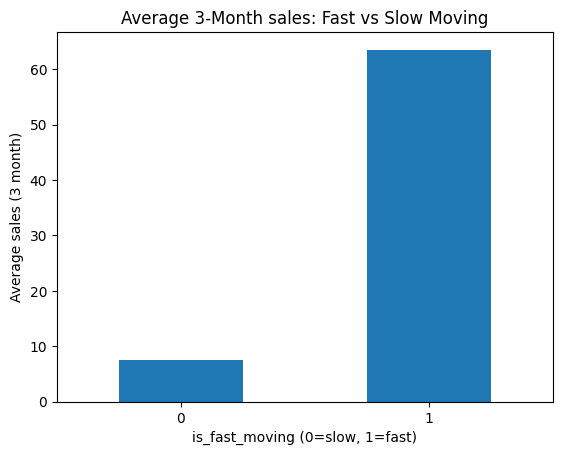

In [ ]:
import matplotlib.pyplot as plt

group_stats = data_frame.groupby("is_fast_moving")["avg_sales_3_month"].mean()

plt.figure()
group_stats.plot(kind="bar")
plt.title("Average 3-Month sales: Fast vs Slow Moving")
plt.xlabel("is_fast_moving (0=slow, 1=fast)")
plt.ylabel("Average sales (3 month)")
plt.xticks(rotation=0)
plt.show()

### If we look above, the fast-moving parts are larger, because the main focus of procurement of goods in the warehouse is parts that sell quickly.

### Distribusi baseline PO qty




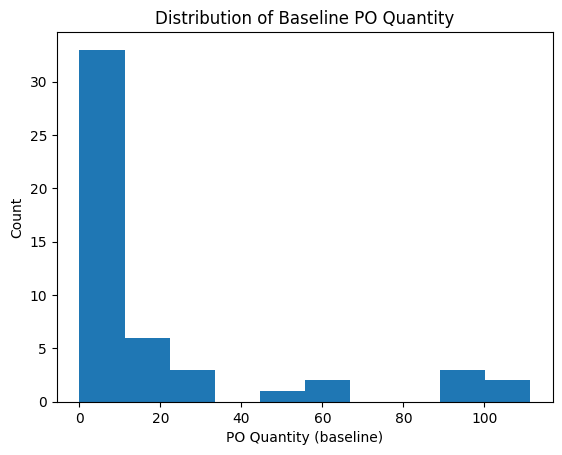

In [ ]:
plt.figure()
plt.hist(data_frame["po_baseline_qty"], bins=10) # graphs to view the distribution of numerical data
plt.title("Distribution of Baseline PO Quantity")
plt.xlabel("PO Quantity (baseline)")
plt.ylabel("Count")
plt.show()

In [ ]:
# The graph above shows the histogram of the calculation results:
# Baseline PO = 3-month average sales - current stock (minimum 0)
# X-axis → Recommended PO quantity using the baseline method (moving average)
# Y-axis → Number of spare part items (count) with that PO value
# indicates that the lower the stock, the higher the recommended Purchase Order Quantity.
# Conversely, the higher the stock, the lower the recommended Purchase Order Quantity.

### Scatter plot stock vs average sales

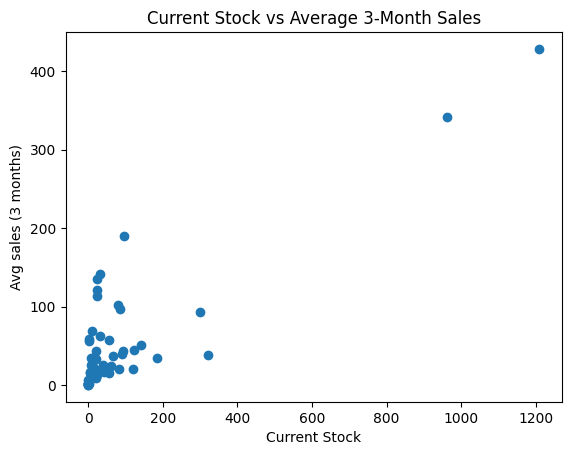

In [ ]:
plt.figure()
plt.scatter(data_frame["current_stock"], data_frame["avg_sales_3_month"])
plt.title("Current Stock vs Average 3-Month Sales")
plt.xlabel("Current Stock")
plt.ylabel("Avg sales (3 months)")
plt.show()

#### scatter plot above displays the actual data in the field where there is a slight anomaly of very large stock (1200 on the top right) and shows that there is indeed a lot of low stock in the warehouse (dots on the bottom left).

# Create Dataset Machine Learning for "Understanding ML Behaviour"
ML Target: Predict “Needs” (Proxy)

We use po_baseline_qty (rule-based results) as the target variable to learn how the model maps input features to Purchase Order recommendations.

## Train Model (Linear Regression & Random Forest) + evaluasi MAE (Mean Absolute Error)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Feature (X) and target (y)
feature_cols = ["qty_sales_oct_2025", "qty_sales_nov_2025", "qty_sales_dec_2025", "current_stock", "is_fast_moving"]
X = data_frame[feature_cols].copy()
y = data_frame["po_baseline_qty"].copy()

# random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
prediction_linear_regression = linear_regression.predict(X_test)
mae_linear_regression = mean_absolute_error(y_test, prediction_linear_regression)

# 2. Random Forest
random_forest = RandomForestRegressor(n_estimators=300, random_state=42)
random_forest.fit(X_train, y_train)
prediction_random_forest = random_forest.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, prediction_random_forest)

print("MAE Linear Regression:", mae_linear_regression)
print("MAE Random Forest: ", mae_random_forest)

MAE Linear Regression: 9.513860903232995
MAE Random Forest:  5.118777777777778


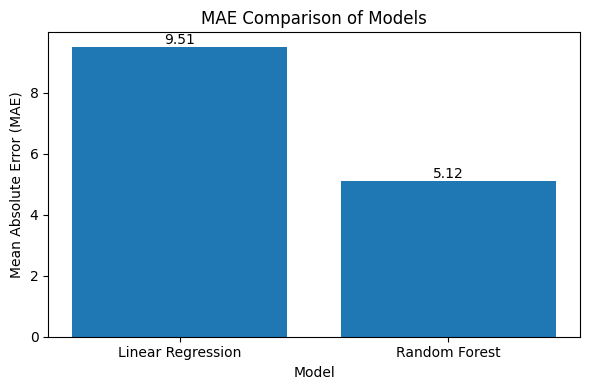

In [ ]:
# MAE values
models = ["Linear Regression", "Random Forest"]
mae_values = [mae_linear_regression, mae_random_forest]

plt.figure(figsize=(6, 4))
plt.bar(models, mae_values)

plt.title("MAE Comparison of Models")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")

# display MAE value above the bar
for i, v in enumerate(mae_values):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### Mean Absolute Error represents the average absolute difference between
- actual value (po_based_qty)
- model predicted value

Printed results:
- MAE Linear Regression: 9.513860903232995
- MAE Random Forest: 5.11877777777778

Interpretation:
- Linear Regression is off by an average of about 9-10 PO quantity units per item.
- Random Forest is off by an average of about 5 PO quantity units per item.

### Visualization Model Result (Predicted vs Actual)

# Model Interpretation

In [ ]:
# A coefficient is a number that shows how much influence a variable has on another variable in a model or formula.
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coef": linear_regression.coef_
}).sort_values("coef", ascending=False)

coef_df

,feature,coef
4,is_fast_moving,1.394485
1,qty_sales_nov_2025,0.348444
0,qty_sales_oct_2025,0.231669
2,qty_sales_dec_2025,0.110558
3,current_stock,-0.251417


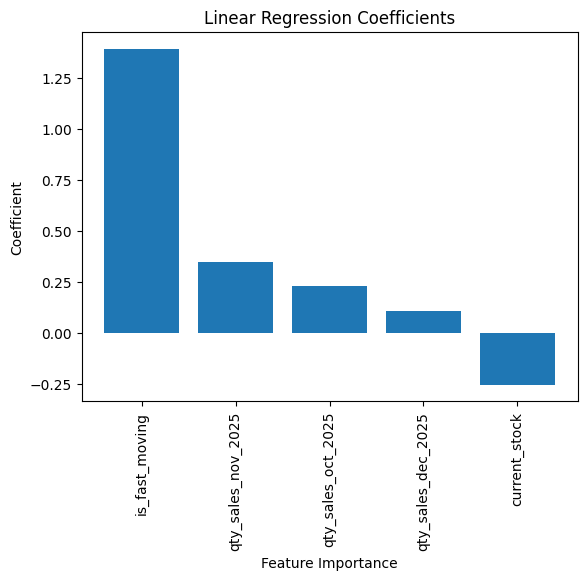

In [ ]:
plt.figure()
plt.bar(coef_df["feature"], coef_df["coef"])
plt.title("Linear Regression Coefficients")
plt.xlabel("Feature Importance")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.show()

### The feature importance that has the highest influence on the quantity of PO in the Linear Regression model is the is_fast_moving feature

### Feature Importance Random Forest

In [ ]:
imp_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": random_forest.feature_importances_
}).sort_values("importance", ascending=False)

imp_df

,feature,importance
1,qty_sales_nov_2025,0.570058
0,qty_sales_oct_2025,0.203383
3,current_stock,0.115962
2,qty_sales_dec_2025,0.110316
4,is_fast_moving,0.000280


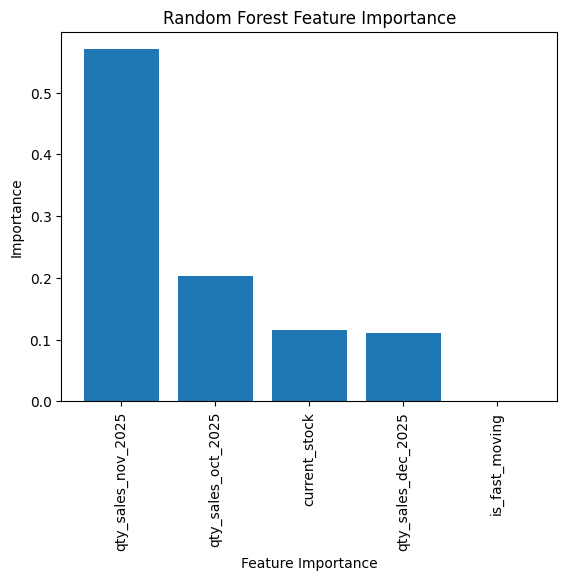

In [ ]:
plt.figure()
plt.bar(imp_df["feature"], imp_df["importance"])
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

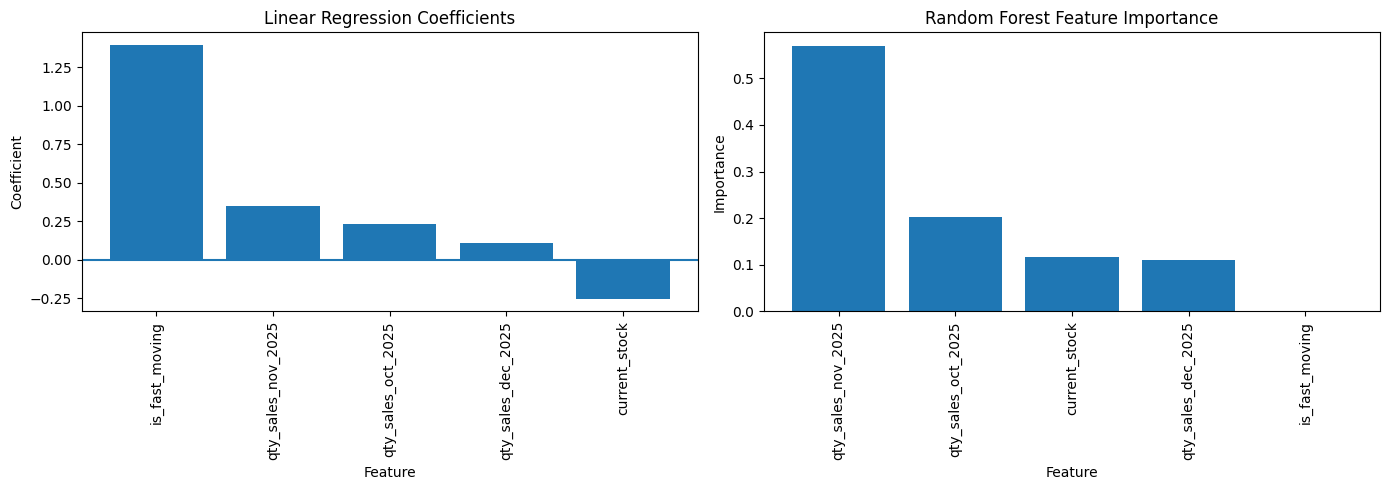

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression Coefficients
axes[0].bar(coef_df["feature"], coef_df["coef"])
axes[0].set_title("Linear Regression Coefficients")
axes[0].set_xlabel("Feature")
axes[0].set_ylabel("Coefficient")
axes[0].tick_params(axis="x", rotation=90)
axes[0].axhline(0)  # zero line to see positive/negative

# Random Forest Feature Importance
axes[1].bar(imp_df["feature"], imp_df["importance"])
axes[1].set_title("Random Forest Feature Importance")
axes[1].set_xlabel("Feature")
axes[1].set_ylabel("Importance")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Creating “PO Recommendation” from ML Model (Final Output)

In [ ]:
data_frame["po_lr_qty"] = np.maximum(linear_regression.predict(X), 0)
data_frame["po_rf_qty"] = np.maximum(random_forest.predict(X), 0)

# math rounding
data_frame["po_lr_qty"] = data_frame["po_lr_qty"].round().astype(int)
data_frame["po_rf_qty"] = data_frame["po_rf_qty"].round().astype(int)

data_frame[["part_code","part_name","po_baseline_qty","po_lr_qty","po_rf_qty"]].head(15)

,part_code,part_name,po_baseline_qty,po_lr_qty,po_rf_qty
0,31926-KYT-901,Busi U27EPR-9 DENSO,111.333333,93,102
1,31917-K0R-V01,BUSI LMAR8L-9 NGK,19.333333,19,16
2,33110-K81-N01,UNIT HEAD LIGHT,0.666667,0,1
3,23100-KZR-601,BAN PENGGERAK,22.000000,55,49
4,23100-K97-T01,BAN PENGGERAK,12.333333,20,11
5,23100-KZL-601,BAN PENGGERAK,0.000000,9,4
6,23100-K1A-N23,BAN PENGGERAK,0.000000,0,7
7,33100-K2F-N01,UNIT HEAD LIGHT,0.333333,0,1
8,23100-K1A-BA0,BAN PENGGERAK SET,0.000000,3,1
9,23100-K0J-BA0,BAN PENGGERAK SET,96.666667,82,92


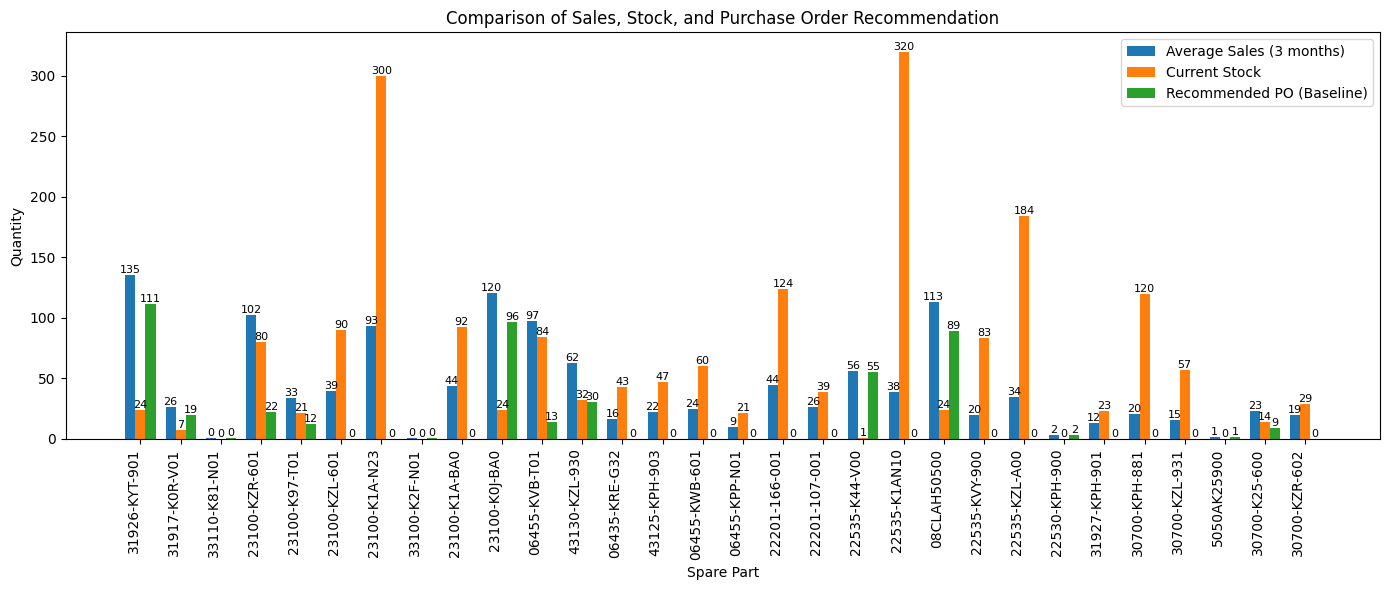

In [ ]:
# visualize the first 30 items so that the graph is not crowded
plot_df = data_frame.head(30)

labels = plot_df["part_code"]
sales = plot_df["avg_sales_3_month"]
stock = plot_df["current_stock"]
po_rec = plot_df["po_baseline_qty"]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(14, 6))

# Sales Bar
bars_sales = plt.bar(x - width, sales, width, label="Average Sales (3 months)")

# Stock Bar
bars_stock = plt.bar(x, stock, width, label="Current Stock")

# PO Recommendation Bar
bars_po = plt.bar(x + width, po_rec, width, label="Recommended PO (Baseline)")

# Function to add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=8
        )

# Add labels to each bar group
add_value_labels(bars_sales)
add_value_labels(bars_stock)
add_value_labels(bars_po)

plt.xlabel("Spare Part")
plt.ylabel("Quantity")
plt.title("Comparison of Sales, Stock, and Purchase Order Recommendation")
plt.xticks(x, labels, rotation=90, ha="right")
plt.legend()

plt.tight_layout()
plt.show()
